# Bereinigung der Datensätze

## Kundendaten

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = 'kunden.csv'

In [3]:
df = pd.read_csv(file, decimal = '.', sep = ";")

In [4]:
df.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552


In [5]:
df.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

### Fehlende Datenpunkte im Datensatz

In [6]:
df.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0
dtype: int64

In [7]:
# Ersetzen der 5 fehlenden Geschlechtseinträge durch den Modalwert:

In [8]:
# Finden des Modalwertes:

In [9]:
ges_modalwert = df['Geschlecht'].mode()[0]

In [10]:
ges_modalwert

1.0

In [11]:
# Ersetzen der 5 fehlenden Geschlechtseinträge mit dem Modalwert 1.0

In [12]:
df.fillna(value = ges_modalwert, axis = 0, inplace = True)

In [13]:
df.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

In [14]:
# hat geklappt, juhuuu!

## Boxplots ausgeben

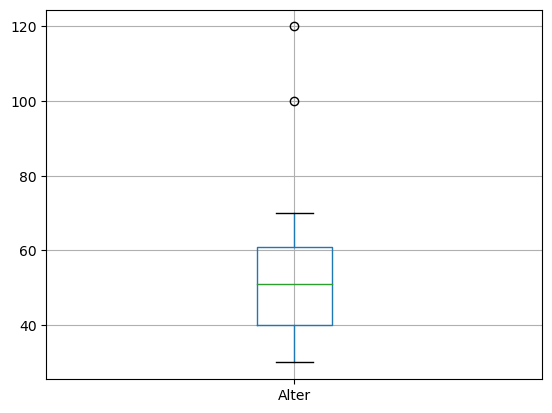

In [15]:
boxplot_alter = df.boxplot(column = 'Alter')

In [16]:
boxplot_einkommen = df.boxplot(column = 'Einkommen')

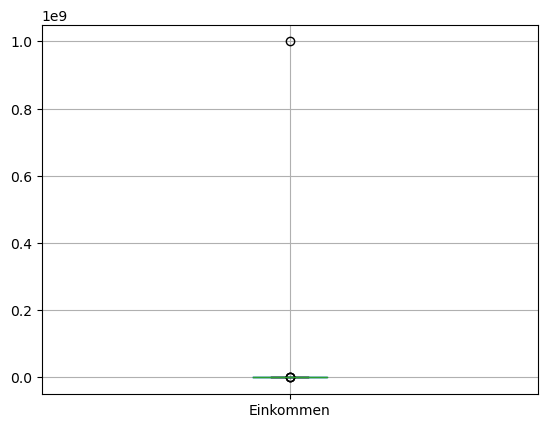

In [17]:
plt.show()

In [18]:
boxplot_preis = df.boxplot(column = 'Preis')

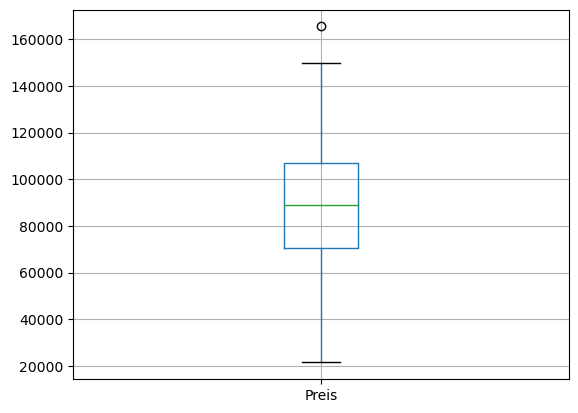

In [19]:
plt.show()

## Außreißer identifizieren

### 1. Alter

In [20]:
# Berechnung von Q1, Q3 und IQR

In [21]:
Q1_Alter = df['Alter'].quantile(0.25)

In [22]:
Q3_Alter = df['Alter'].quantile(0.75)

In [23]:
IQR_Alter = Q3_Alter - Q1_Alter

In [24]:
# Berechnung der Ausreißer-Grenzen

In [25]:
untere_grenze_Alter = Q1_Alter - 1.5 * IQR_Alter

In [26]:
obere_grenze_Alter = Q3_Alter + 1.5 * IQR_Alter

In [27]:
df['Ausreißer'] = (df['Alter'] < untere_grenze_Alter) | (df['Alter'] > obere_grenze_Alter)

In [28]:
ausreißer_alter = df.Ausreißer.value_counts()

In [29]:
ausreißer_alter

Ausreißer
False    1102
True        2
Name: count, dtype: int64

In [30]:
df.loc[df['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
142,100,88749.0,119134.23,0.0,64.0,K0494,True
711,120,61857.0,104214.07,1.0,52.0,K0039,True


In [31]:
# Ersetzen der Ausreißer in der Alters-Spalte durch Medianwert

In [32]:
alter_median = df['Alter'].median()

In [33]:
alter_median

51.0

In [34]:
df.replace([120, 100], alter_median, inplace=True)
df

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
0,64,66894.0,88160.31,1.0,43.0,K0310,False
1,54,77644.0,103145.70,1.0,40.0,K1042,False
2,55,44341.0,80565.16,0.0,37.0,K0382,False
3,49,67271.0,83949.89,0.0,42.0,K0498,False
4,46,49832.0,93781.58,0.0,41.0,K0552,False
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,False
1100,38,48301.0,64230.98,1.0,33.0,K0122,False
1101,67,63547.0,103123.57,1.0,41.0,K1045,False
1102,37,32686.0,49215.87,1.0,36.0,K1096,False


In [35]:
df['Ausreißer'] = (df['Alter'] < untere_grenze_Alter) | (df['Alter'] > obere_grenze_Alter)

In [36]:
ausreißer_alter = df.Ausreißer.value_counts()

In [37]:
ausreißer_alter

Ausreißer
False    1104
Name: count, dtype: int64

In [38]:
# keine Ausreißer in der Alters-Spalte mehr vorhanden

### 2. Einkommen

In [39]:
# Berechnung von Q1, Q3 und IQR der Einkommens-Spalte

In [40]:
Q1_einkommen = df['Einkommen'].quantile(0.25)
Q3_einkommen = df['Einkommen'].quantile(0.75)
IQR_einkommen = Q3_einkommen - Q1_einkommen
IQR_einkommen
untere_grenze_einkommen = Q1_einkommen - 1.5 * IQR_einkommen
obere_grenze_einkommen = Q3_einkommen + 1.5 * IQR_einkommen
df['Ausreißer'] = (df['Einkommen'] < untere_grenze_einkommen) | (df['Einkommen'] > obere_grenze_einkommen)
ausreißer_einkommen = df.Ausreißer.value_counts()
ausreißer_einkommen

Ausreißer
False    1100
True        4
Name: count, dtype: int64

In [41]:
df.loc[df['Ausreißer'] == True]


,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
408,68,1.000000e+09,87209.72,0.0,52.0,K0701,True
834,68,1.076890e+05,165482.31,1.0,60.0,K0415,True
966,69,0.000000e+00,125140.05,1.0,65.0,K1021,True
1082,59,-6.284037e+04,92837.59,0.0,46.0,K1083,True


In [42]:
# Ersetzen der Ausreißer in der Einkommens-Spalte durch Medianwert
einkommen_median = df['Einkommen'].median()
df.replace({'Einkommen': [1.000000e+09, 1.076890e+05, 0.000000e+00, -62840.374523]}, einkommen_median, inplace=True)
df.loc[df['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
408,68,59013.0,87209.72,0.0,52.0,K0701,True
834,68,59013.0,165482.31,1.0,60.0,K0415,True
966,69,59013.0,125140.05,1.0,65.0,K1021,True
1082,59,59013.0,92837.59,0.0,46.0,K1083,True


### 3. Zeit

In [43]:
# Berechnung von Q1, Q3 und IQR der Zeit-Spalte

In [44]:
Q1_zeit = df['Zeit'].quantile(0.25)
Q3_zeit = df['Zeit'].quantile(0.75)
IQR_zeit = Q3_zeit - Q1_zeit
IQR_zeit
untere_grenze_zeit = Q1_zeit - 1.5 * IQR_zeit
obere_grenze_zeit = Q3_zeit + 1.5 * IQR_zeit
df['Ausreißer'] = (df['Zeit'] < untere_grenze_zeit) | (df['Zeit'] > obere_grenze_zeit)
ausreißer_zeit = df.Ausreißer.value_counts()
ausreißer_zeit

Ausreißer
False    1098
True        6
Name: count, dtype: int64

In [45]:
df.loc[df['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
218,33,38675.0,56493.40,1.0,13.0,K0983,True
313,62,96569.0,140745.65,0.0,80.0,K0249,True
327,34,24811.0,57541.73,1.0,12.0,K0395,True
542,67,89170.0,123408.48,1.0,76.0,K1093,True
553,38,33666.0,50494.07,1.0,13.0,K0384,True
805,64,91409.0,140161.07,1.0,76.0,K0897,True


In [46]:
# Ausreißer-Zeiten scheinen nicht absurd hoch oder niedrig, daher bleiben sie im Datensatz unbereinigt stehen

## Geodaten

In [48]:
file = "geo.txt"
df_geo = pd.read_csv("geo.txt", sep = "\t")

In [50]:
df_geo.head()

,KundeNr,Niederlassung
0,K0001,Sachsen
1,K0002,NRW
2,K0003,Hessen
3,K0004,Bayern
4,K0005,Bayern


In [55]:
# Alle unterschiedlichen Einträge in 'Niederlassung' anzeigen
einzigartige_werte_niederlassung = df_geo['Niederlassung'].unique()
einzigartige_werte_niederlassung

array(['Sachsen', 'NRW', 'Hessen', 'Bayern', 'Baden-Württemberg',
       'Nordrhein-Westfalen', 'Berlin', 'Niedersachsen', 'Brandenburg',
       'Thüringen', 'Hamburg', 'Düsseldorf', 'Berlin-Charlottenburg',
       'Berlin-Mitte', 'BERLIN'], dtype=object)

In [56]:
# "NRW" durch "Nordrhein-Westfalen" ersetzen
df_geo.replace("NRW", "Nordrhein-Westfalen", inplace=True)
df_geo

,KundeNr,Niederlassung
0,K0001,Sachsen
1,K0002,Nordrhein-Westfalen
2,K0003,Hessen
3,K0004,Bayern
4,K0005,Bayern
...,...,...
1990,K1991,Hessen
1991,K1992,Baden-Württemberg
1992,K1993,Nordrhein-Westfalen
1993,K1994,Berlin


In [57]:
# "Berlin" vereinheitlichen
df_geo.replace(["Berlin-Charlottenburg", "Berlin-Mitte", "BERLIN"], "Berlin", inplace=True)
df_geo

,KundeNr,Niederlassung
0,K0001,Sachsen
1,K0002,Nordrhein-Westfalen
2,K0003,Hessen
3,K0004,Bayern
4,K0005,Bayern
...,...,...
1990,K1991,Hessen
1991,K1992,Baden-Württemberg
1992,K1993,Nordrhein-Westfalen
1993,K1994,Berlin


In [58]:
# Überprüfung
einzigartige_werte_niederlassung = df_geo['Niederlassung'].unique()
einzigartige_werte_niederlassung

array(['Sachsen', 'Nordrhein-Westfalen', 'Hessen', 'Bayern',
       'Baden-Württemberg', 'Berlin', 'Niedersachsen', 'Brandenburg',
       'Thüringen', 'Hamburg', 'Düsseldorf'], dtype=object)

In [59]:
# Überprüfung, ob fehlende Datenpunkte vorhanden sind
df_geo.isnull().sum()

KundeNr          0
Niederlassung    0
dtype: int64